In [24]:
import cvxpy as cp
import numpy as np
from scipy.special import xlogy
import matplotlib.pyplot as plt

**Problem**

$\min_{p_1, p_2, ..., p_n} \sum_{i=1}^{n} -p_i \log_2{p_i} 
\\
\text{s.b.} \ \ \  0 \le p_{i} \le p_{i+1} : i \in \{1,....,n-1\}
\\
\ \ \ \ \ \ \ \ p_n \le cp_1
\\
\ \ \ \ \ \ \ \ \sum_{i=1}^{n} p_i = 1
$


**Solution**

Using k.k.t we have:


In [31]:
n = 6
c = 20

# variables
p = cp.Variable(n)

# constraints
constraints = []
constraints.append(p[0] >= 0)
for i in range(n-1):
    constraints.append(p[i] <= p[i+1])
constraints.append(p[n-1] <= c * p[0])
constraints.append(cp.sum(p) == 1)

# solution
obj = cp.Maximize(cp.sum(cp.entr(p)))
prob = cp.Problem(obj, constraints)
prob.solve()

1.7917594591815245

In [12]:
p.value

array([0.1666389 , 0.16665303, 0.16666276, 0.16667153, 0.1666808 ,
       0.16669298])

In [28]:
p_sum = 1
p = np.linspace(0,p_sum,100)
h = -xlogy(p, p) - xlogy(p_sum - p, p_sum - p)

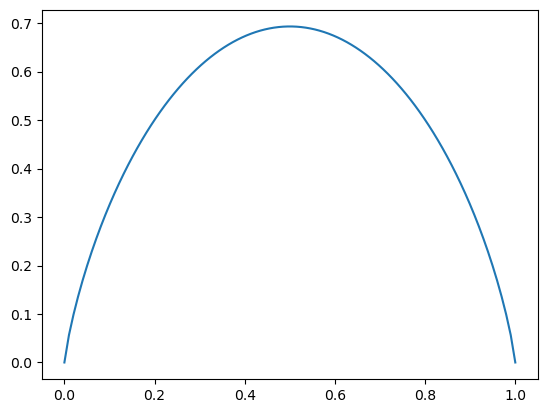

In [29]:
plt.plot(p, h)